<a href="https://colab.research.google.com/github/himanshuchrist/ML/blob/ML_Lab/Lab2_2348520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To connect Google Drive and Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings. filterwarnings('ignore')

In [3]:
#loading the dataset
data=pd.read_csv('/content/drive/MyDrive/Invistico_Airline.csv')
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
#checking for null values
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
#dropping the rows with null values
data=data.dropna()

<Axes: >

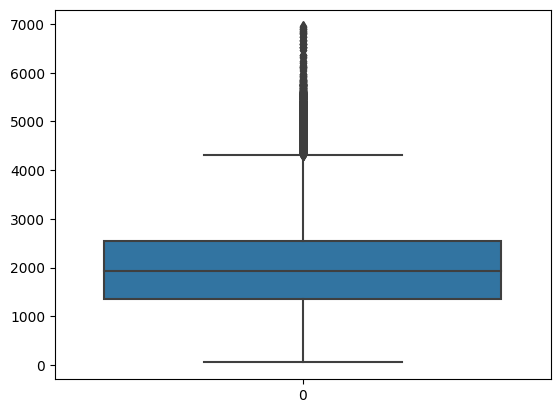

In [6]:
#Plotting Flight distance on boxplot to see outliers
sns.boxplot(data['Flight Distance'])

In [7]:
#Defining function to find outliers and drop them from the data
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))
#Removing ouliers
drop_outlier(data,data['Flight Distance'])

(129487, 23)
New data shape post deletion: (127583, 23)


<Axes: >

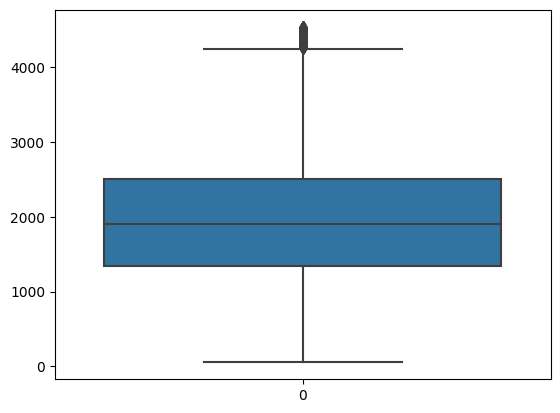

In [8]:
sns.boxplot(data['Flight Distance'])

(array([ 6355., 12099., 21055., 19029., 21835., 21358., 17001.,  7133.,
         1490.,   228.]),
 array([ 7. , 14.8, 22.6, 30.4, 38.2, 46. , 53.8, 61.6, 69.4, 77.2, 85. ]),
 <BarContainer object of 10 artists>)

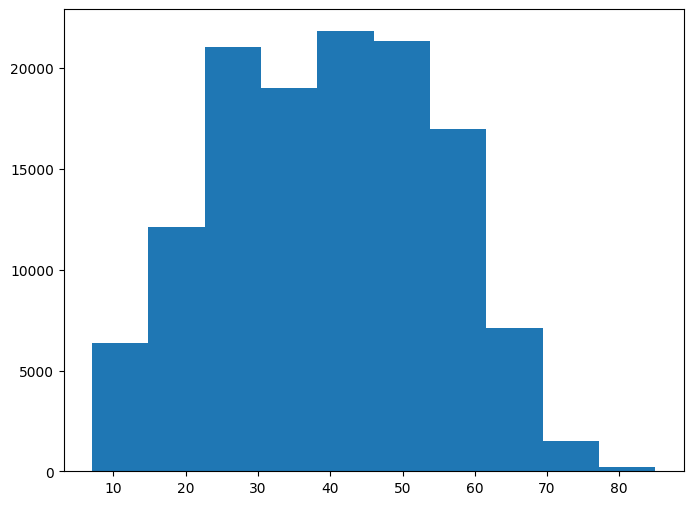

In [9]:
#plotting age before binning
plt.figure(figsize=(8,6))
plt.hist(data['Age'])

<Axes: >

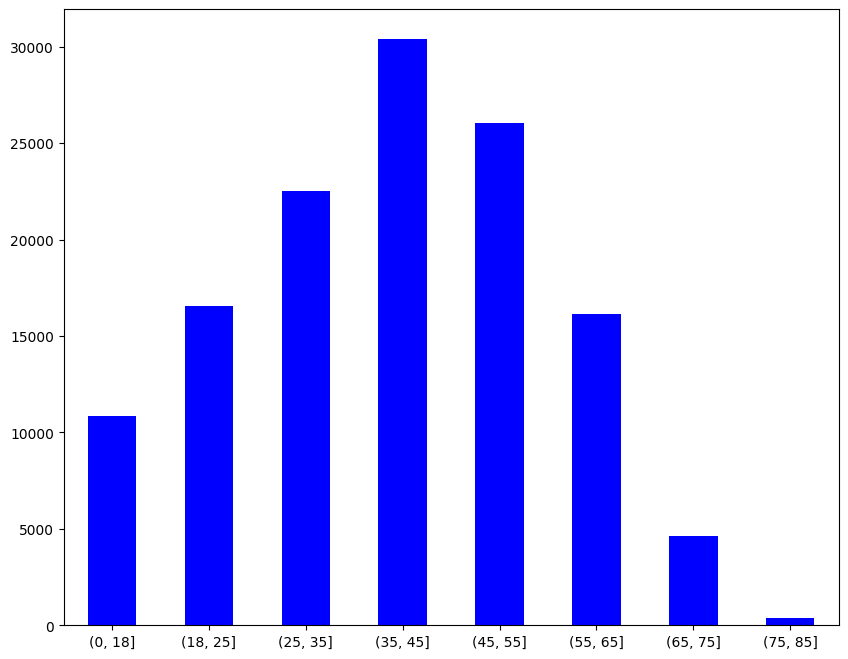

In [10]:
#binning data and plotting the same
cut_bins = [0, 18, 25, 35, 45, 55, 65, 75, 85]
data['bin'] = pd.cut(data['Age'], bins=cut_bins)
data['bin'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,8))

In [11]:
#changing categorical data to numerical data
for col in ['satisfaction','Gender','Customer Type']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,bin
0,1,0,0,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,"(55, 65]"
1,1,1,0,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,"(45, 55]"
2,1,0,0,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,"(0, 18]"
3,1,0,0,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,"(55, 65]"
4,1,0,0,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,"(65, 75]"


In [12]:
#creating new column rating which is the mean of all other ratings and finding covariance between rating and age
data['Rating']=round(data[['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Cleanliness']].mean(axis=1))
data[['Rating', 'Age']].cov()

,Rating,Age
Rating,0.544770,0.766679
Age,0.766679,228.815013


In [13]:
#finding covariance between all kinds of ratings
df=data[['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Cleanliness']]
df.cov()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Cleanliness
Seat comfort,1.941944,0.920297,1.442395,0.729411,0.233616,0.804881,0.214622,0.384836,0.216824,0.247478,0.192152,0.070003,0.174780,0.174780
Departure/Arrival time convenient,0.920297,2.335550,1.157471,1.075808,-0.002825,0.160845,-0.000621,0.003990,0.119183,0.058407,0.119648,0.122963,0.119307,0.119307
Food and drink,1.442395,1.157471,2.083067,0.977977,0.048775,0.723999,0.054033,0.078889,0.073036,0.140603,0.061259,0.021414,0.055724,0.055724
Gate location,0.729411,1.075808,0.977977,1.701457,-0.006668,-0.000602,0.004567,0.002984,-0.041628,-0.013041,-0.001432,-0.054151,-0.003368,-0.003368
Inflight wifi service,0.233616,-0.002825,0.048775,-0.006668,1.741059,0.437008,0.954375,1.031967,0.099660,0.056697,0.055719,0.146900,0.054725,0.054725
Inflight entertainment,0.804881,0.160845,0.723999,-0.000602,0.437008,1.815750,0.768522,0.556907,0.315197,0.281629,0.181307,0.376242,0.167774,0.167774
Online support,0.214622,-0.000621,0.054033,0.004567,0.954375,0.768522,1.710303,1.051755,0.261688,0.234456,0.153332,0.335104,0.141533,0.141533
Ease of Online booking,0.384836,0.003990,0.078889,0.002984,1.031967,0.556907,1.051755,1.707690,0.730017,0.605448,0.606278,0.224185,0.632712,0.632712
On-board service,0.216824,0.119183,0.073036,-0.041628,0.099660,0.315197,0.261688,0.730017,1.613931,0.683399,0.785982,0.403389,0.813452,0.813452
Leg room service,0.247478,0.058407,0.140603,-0.013041,0.056697,0.281629,0.234456,0.605448,0.683399,1.668643,0.620720,0.274433,0.620060,0.620060


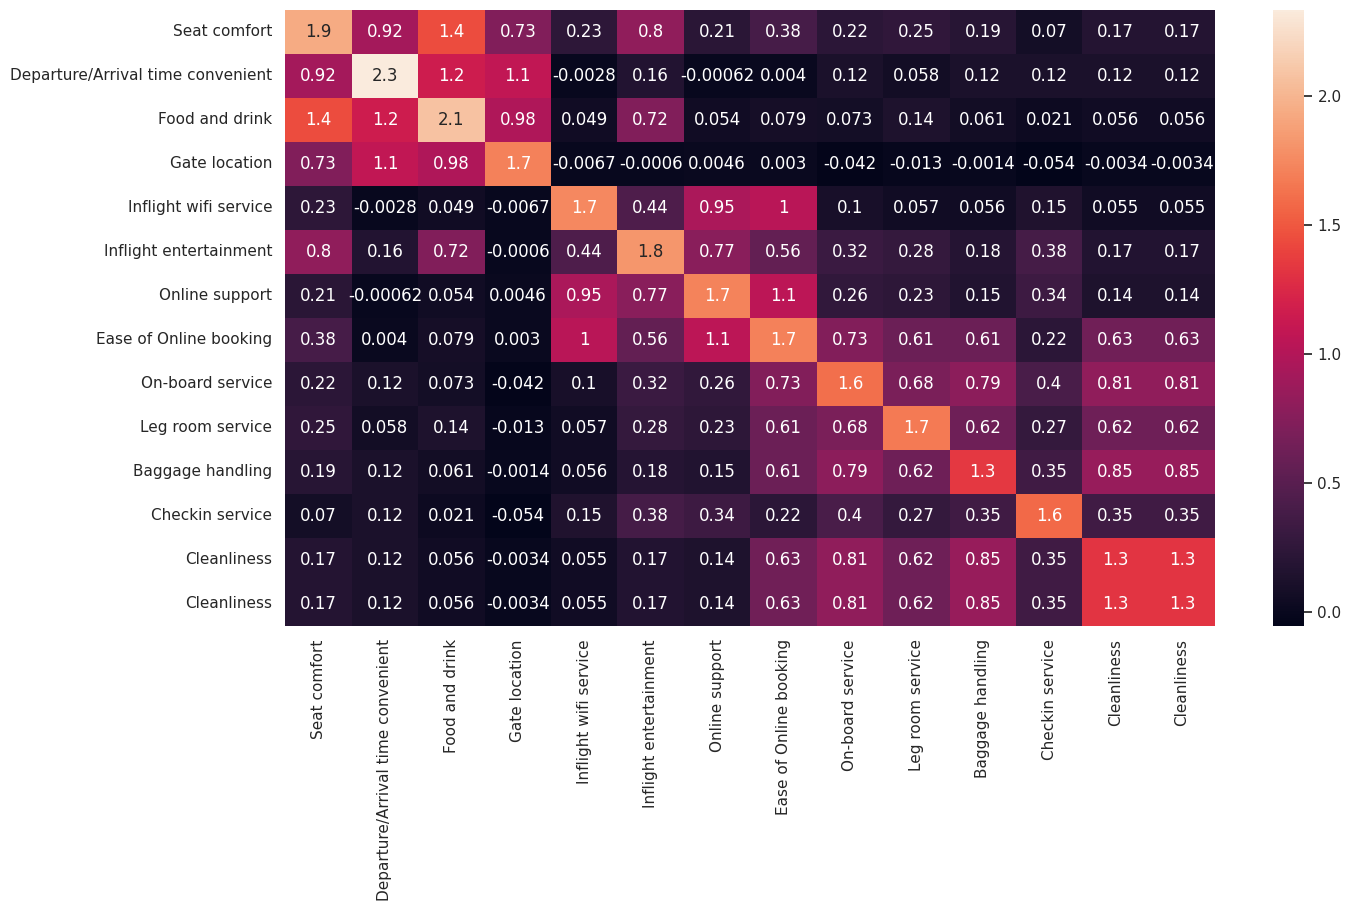

In [14]:
#plotting the variance on heatmap
sns.set (rc = {'figure.figsize':(15, 8)})
sns.heatmap(df.cov(),annot=True)
plt.show()

In [15]:
#checking for association between gender and repeat purchase using chi square
X=data[['Customer Type']]
Y=data['Gender']
chi_scores=chi2(X,Y)
chi_scores

(array([98.96884188]), array([2.56505899e-23]))

H0-> There exists no relationship
>
H1->There exists a relationship
>
since p value is close to 0 which is less then 0.05, we reject H0.

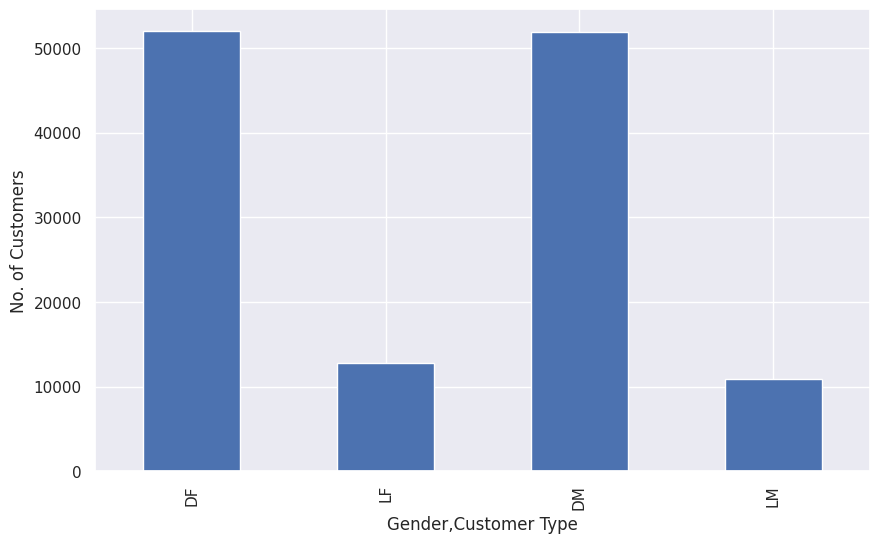

In [28]:
#Plotting Gender and Customer Loyalty
data.groupby(['Gender', 'Customer Type']).count()['satisfaction'].plot(kind='bar', figsize=(10,6))
plt.xticks(ticks=[0,1,2,3], labels=['DF', 'LF', 'DM', 'LM'])
plt.ylabel('No. of Customers')
plt.show()

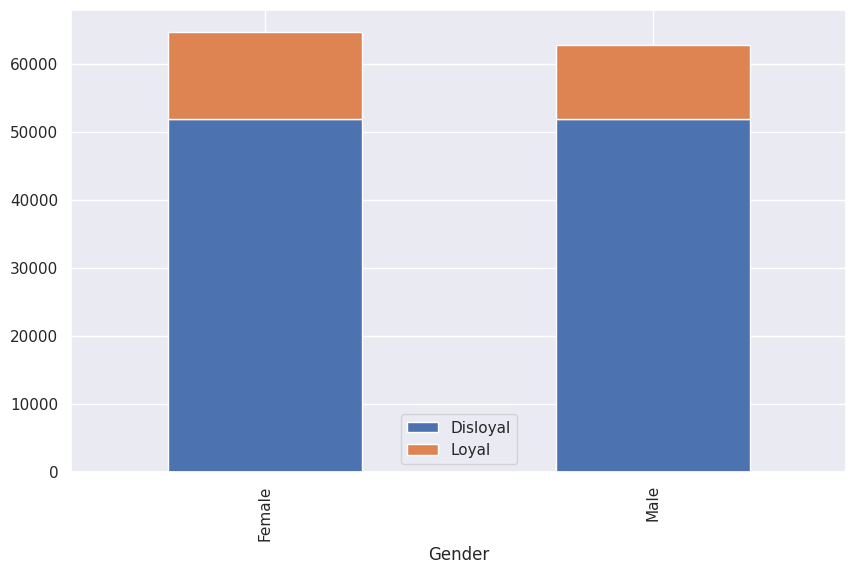

In [27]:
#Plotting the same on Stacked Bar Graph
data.groupby(['Gender', 'Customer Type']).count()['satisfaction'].unstack().plot(kind='bar', stacked=True,figsize=(10,6))
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(labels=['Disloyal', 'Loyal'])
plt.show()

In [20]:
#checking relation between product rating and customer loyalty using t-test
d1=data[data['Customer Type']==1]['Flight Distance']
d2=data[data['Customer Type']==0]['Flight Distance']
stats.ttest_ind(a=d1, b=d2, equal_var=True)

Ttest_indResult(statistic=14.844974913300282, pvalue=8.253107532053649e-50)

H0->There is no correlation.
>
H1->There exists a correlation.
>
Since the p value < 0.05 we fail to reject null hypothesis.